Shape of dataset: (386, 10)
Size of dataset: 3860
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        386 non-null    object
 1   age          386 non-null    object
 2   menopause    386 non-null    object
 3   tumor-size   385 non-null    object
 4   inv-nodes    385 non-null    object
 5   node-caps    386 non-null    object
 6   deg-malig    386 non-null    int64 
 7   breast       386 non-null    object
 8   breast-quad  386 non-null    object
 9   irradiat     386 non-null    object
dtypes: int64(1), object(9)
memory usage: 30.3+ KB
None
Duplicate rows: 11
Missing values before treatment:
class           0
age             0
menopause       0
tumor-size      1
inv-nodes       1
node-caps      12
deg-malig       0
breast          0
breast-quad     6
irradiat        0
dtype: int64
Missing values after treatment:
class          0
age

/tmp/ipykernel_55/2886022823.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


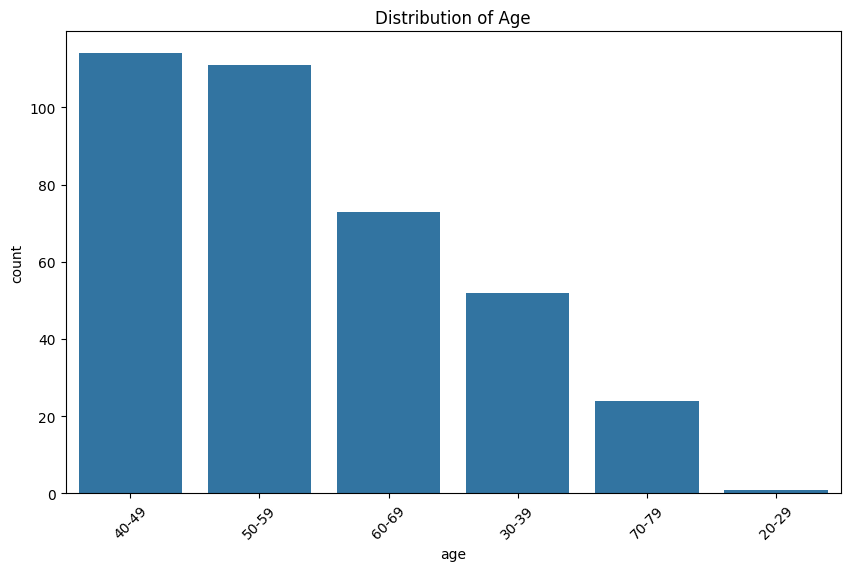

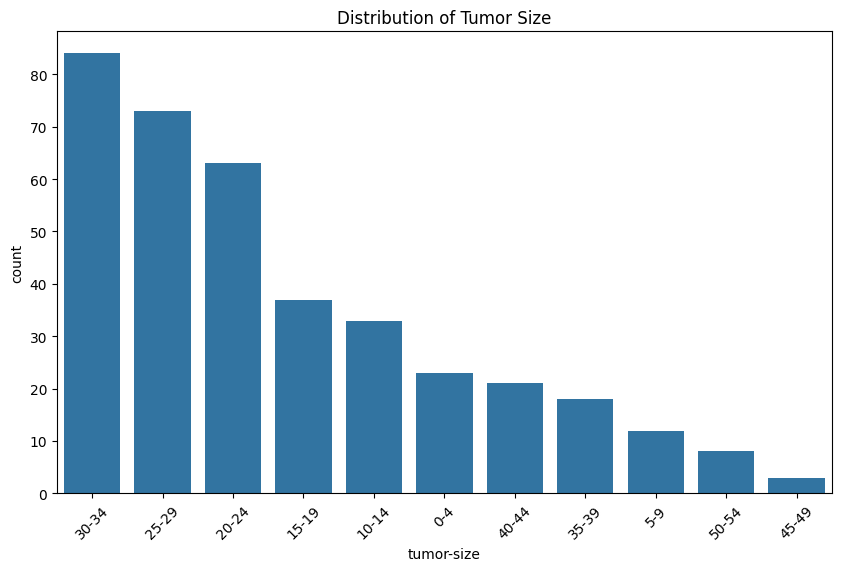

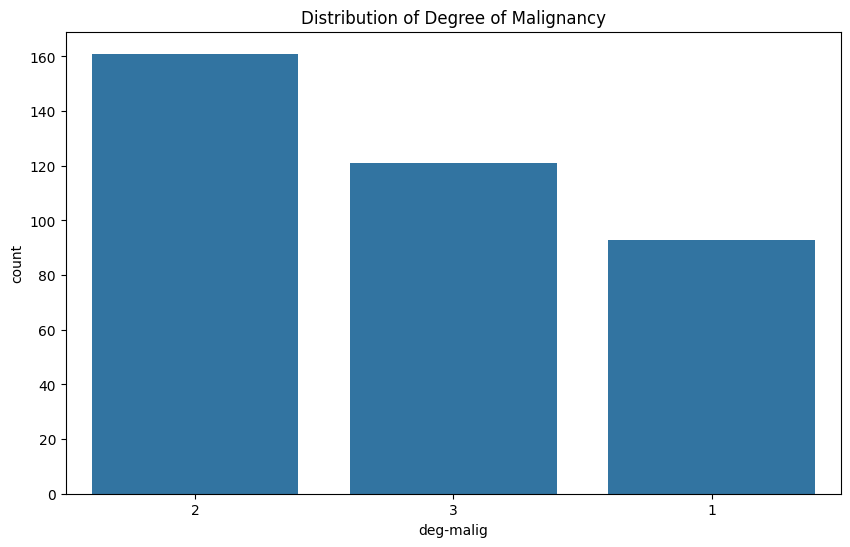

KNN Classifier Report:
                      precision    recall  f1-score   support

no-recurrence-events       0.66      0.84      0.74        51
   recurrence-events       0.20      0.08      0.12        24

            accuracy                           0.60        75
           macro avg       0.43      0.46      0.43        75
        weighted avg       0.51      0.60      0.54        75

KNN with GridSearchCV Report:
                      precision    recall  f1-score   support

no-recurrence-events       0.69      0.94      0.79        51
   recurrence-events       0.40      0.08      0.14        24

            accuracy                           0.67        75
           macro avg       0.54      0.51      0.47        75
        weighted avg       0.59      0.67      0.58        75

Logistic Regression Report:
                      precision    recall  f1-score   support

no-recurrence-events       0.70      0.88      0.78        51
   recurrence-events       0.45      0.21   

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load dataset from a given URL
url = 'https://raw.githubusercontent.com/joestubbs/coe379L-sp25/master/datasets/unit01/project1.csv'
df = pd.read_csv(url)

# Basic Information
print(f"Shape of dataset: {df.shape}")
print(f"Size of dataset: {df.size}")
print(df.info())

# Handle Duplicate Rows
print(f"Duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

# Handle Missing Values
df.replace(['?', '*'], np.nan, inplace=True)
print("Missing values before treatment:")
print(df.isnull().sum())

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after treatment:")
print(df.isnull().sum())

# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age', order=df['age'].value_counts().index)
plt.title('Distribution of Age')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tumor-size', order=df['tumor-size'].value_counts().index)
plt.title('Distribution of Tumor Size')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='deg-malig', order=df['deg-malig'].value_counts().index)
plt.title('Distribution of Degree of Malignancy')
plt.show()

# One-Hot Encoding of Categorical Variables
categorical_columns = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
                       'breast', 'breast-quad', 'irradiat']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    
# Splitting the dataset into training and test sets
y = df_encoded['class']  # Assuming 'Class' is the target variable
X = df_encoded.drop(columns=['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Classifier Report:")
print(classification_report(y_test, y_pred_knn))

# Separate K-Nearest Neighbors with GridSearchCV
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred_knn_cv = grid_search.best_estimator_.predict(X_test)
print("KNN with GridSearchCV Report:")
print(classification_report(y_test, y_pred_knn_cv))

# Separate Linear Classification (Logistic Regression)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))
